# Denoising filters

![Task](pics/task.jpg)

In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import math
%matplotlib inline

In [2]:
noisy = cv.imread('pics/noisy.jpg', 0)

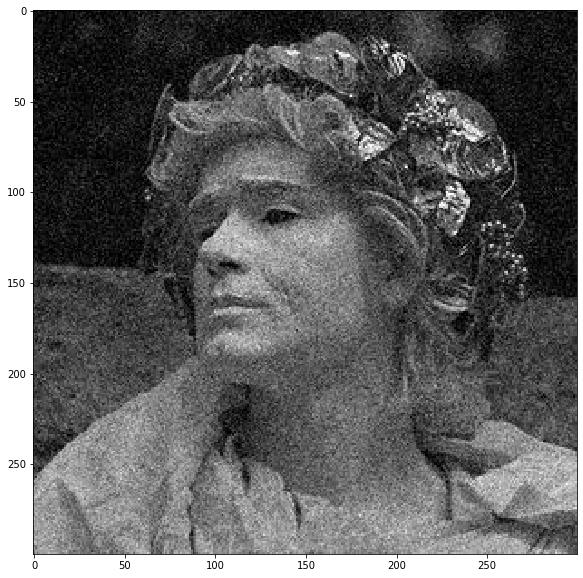

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(noisy, cmap='gray')

# Gaussian filter

In [53]:
def gaussian(v, sigma):
    return np.exp((-v) / (2 * sigma ** 2)) / (2 * math.pi * sigma ** 2)

def gauss(x, y, sigma):
    return math.exp((-x **2 - y ** 2) / (2 * sigma ** 2)) / (2 * math.pi * sigma ** 2)

def gauss_kernel(sigma, size=3):
    K = round(sigma * size)
    kernel = np.zeros((K * 2 + 1, K * 2 + 1))
    for i in np.arange(-K, K + 1):
        for j in np.arange(-K, K + 1):
            kernel[i + K, j + K] = gauss(i, j, sigma)
    return kernel / kernel.sum()

def gauss_filter(img, sigma):
    return cv.filter2D(img, 0, gauss_kernel(sigma))

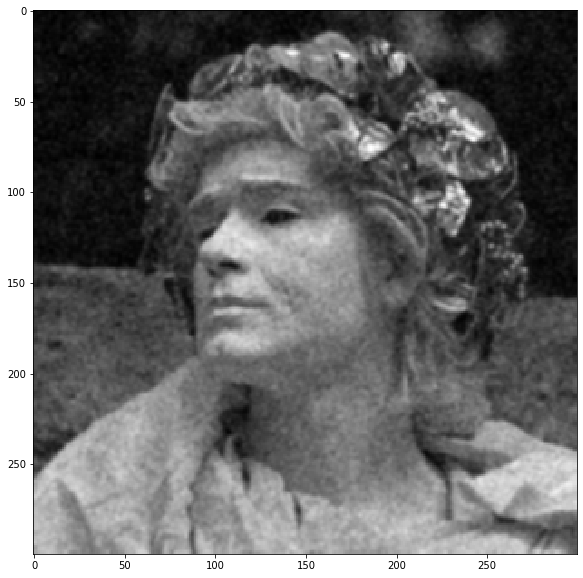

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(gauss_filter(noisy, 1), cmap='gray')

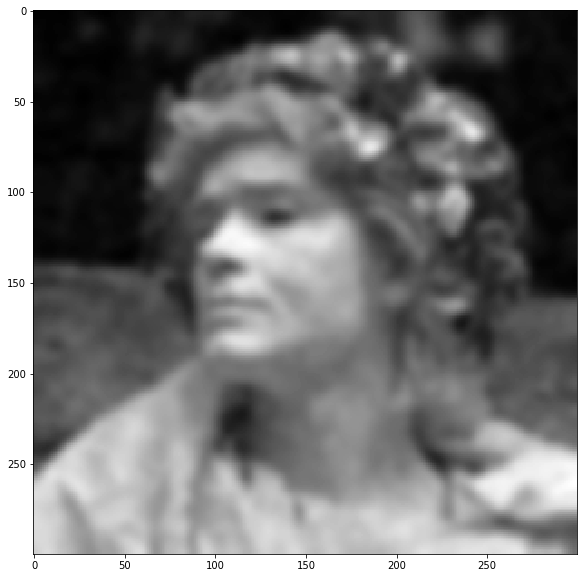

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(gauss_filter(noisy, 3), cmap='gray')

# Bilateral filter

In [67]:
# http://jamesgregson.ca/bilateral-filtering-in-python.html
def bilateral_filter(img, sigma_s, sigma_r, size=3):
    # define the window width to be the 3 time the spatial std. dev. to 
    # be sure that most of the spatial kernel is actually captured
    win_width = round(sigma_s * size)

    # initialize the results and sum of weights to very small values for
    # numerical stability. not strictly necessary but helpful to avoid
    # wild values with pathological choices of parameters
    wgt_sum = np.ones(img.shape) * 1e-8
    result = img * 1e-8

    # accumulate the result by circularly shifting the image across the
    # window in the horizontal and vertical directions. within the inner
    # loop, calculate the two weights and accumulate the weight sum and 
    # the unnormalized result image
    for shft_x in np.arange(-win_width, win_width + 1):
        for shft_y in np.arange(-win_width, win_width + 1):
            # compute the spatial weight
            w = gaussian(shft_x ** 2 + shft_y ** 2, sigma_s)

            # shift by the offsets
            off = np.roll(img, [shft_y, shft_x], axis=[0, 1])

            # compute the value weight
            tw = w * gaussian((off - img) ** 2, sigma_r)

            # accumulate the results
            result += off*tw
            wgt_sum += tw

    # normalize the result and return
    return result / wgt_sum

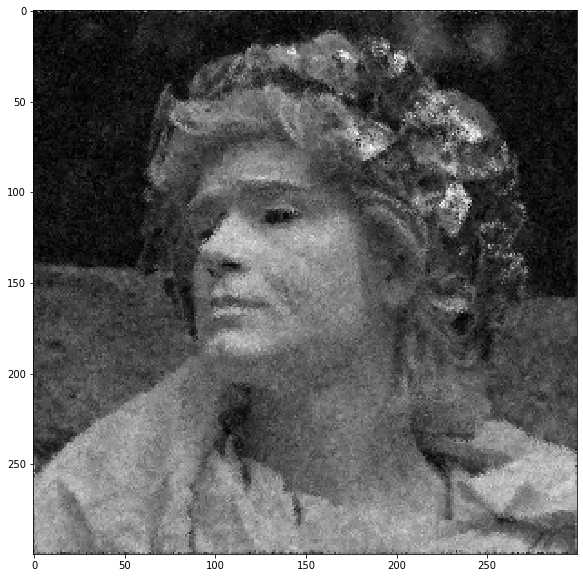

In [68]:
plt.figure(figsize=(10, 10))
plt.imshow(bilateral_filter(noisy, 1, 3), cmap='gray')

# Non-local means (NLM)

In [69]:
# http://dsvision.github.io/an-approach-to-non-local-means-denoising.html